# 1-2

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [28]:
%matplotlib inline

In [29]:
#import data set
df= pd.read_csv(r'C:\Users\Riley\Desktop\Data Any\A6\Data\Prepared Data\Airlines_Cleaned_3.csv')

In [30]:
df.shape

(539383, 11)

In [31]:
# check
df.head()

,id,Airline,Flight,AirportFrom,StateFrom,AirportTo,StateTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,California,IAH,Texas,3,15,205,1
1,2,US,1558,PHX,Arizona,CLT,North Carolina,3,15,222,1
2,3,AA,2400,LAX,California,DFW,Texas,3,20,165,1
3,4,AA,2466,SFO,California,DFW,Texas,3,20,195,1
4,5,AS,108,ANC,Alaska,SEA,Washington,3,30,202,0


In [32]:
df1 = df[['Flight','DayOfWeek','Time','Length','Delay']]

In [33]:
df1.head()

,Flight,DayOfWeek,Time,Length,Delay
0,269,3,15,205,1
1,1558,3,15,222,1
2,2400,3,20,165,1
3,2466,3,20,195,1
4,108,3,30,202,0


# 3

In [34]:
#Elbow Technique
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [35]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))]

score

[-2349815507758.378,
 -603982328471.1804,
 -288042842242.14233,
 -169170548025.11752,
 -120644997854.75645,
 -98093734461.53082,
 -82726930497.35672,
 -74038105651.27667,
 -67516028674.26799]

# 4

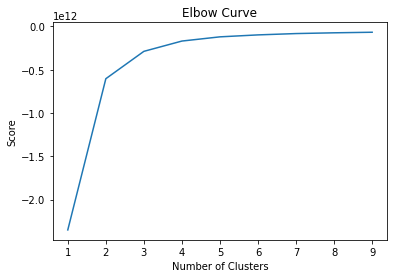

In [36]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow begins to straighten out after 3 so that means 3 clusters is the right amount.

# 5-6

In [37]:
# Create K-means

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [39]:
kmeans.fit(df1)

C:\Users\Riley\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [41]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\Riley\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Riley\AppData\Local\Temp/ipykernel_8288/865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [42]:
df1.head()

,Flight,DayOfWeek,Time,Length,Delay,clusters
0,269,3,15,205,1,1
1,1558,3,15,222,1,1
2,2400,3,20,165,1,0
3,2466,3,20,195,1,0
4,108,3,30,202,0,1


In [43]:
df1['clusters'].value_counts()

1    282044
0    161152
2     96187
Name: clusters, dtype: int64

# 7

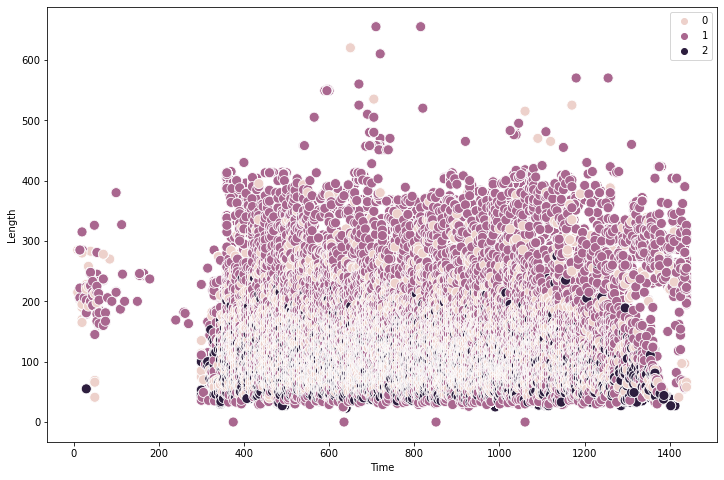

In [46]:
# Plot Cluster
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Time'], y=df1['Length'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Time') 
plt.ylabel('Length') 
plt.show()

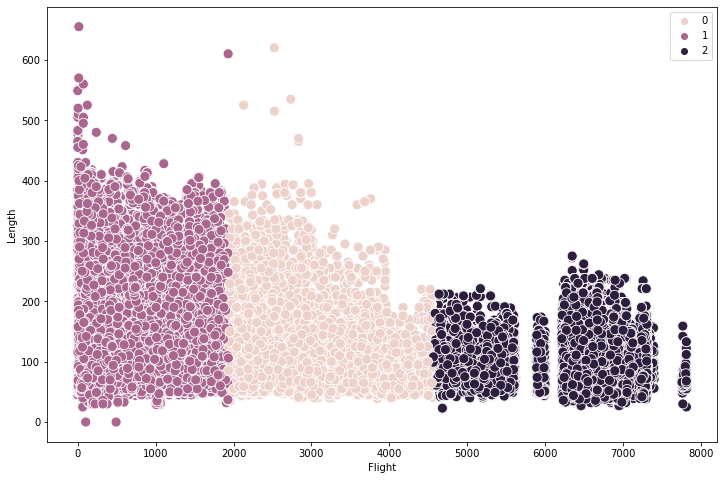

In [48]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Flight'], y=df1['Length'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Flight') 
plt.ylabel('Length') 
plt.show()

#8 The first chart was a little all over the place with no real 'clusters' this chart on the other hand has some really interesting groupings based on the type of aircraft and length of a flight.

In [50]:
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Riley\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Riley\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# 9

In [51]:
df1.groupby('cluster').agg({'Time':['mean', 'median'], 
                         'Length':['mean', 'median'], 
                         'Flight':['mean', 'median']})                         

Time             Length              Flight        
                   mean median        mean median         mean  median
cluster                                                               
dark purple  803.061963  800.0   95.726200   90.0  6089.108133  6347.0
pink         797.905332  790.0  117.646638  106.0  3027.705098  2857.0
purple       805.371485  797.0  152.958077  137.0   836.641276   749.0

#9/10 My findings here were pretty similar to my previous charts, but the different colored cluster really brought some new insights about the Flight/Length chart. I'm guessing the larger aircraft usually have a higher number assigned to them hence the longer flights, but I'll have to look into that as well as the means and medians for length and time. They could help reveal more patterns about most common lenght and time of flights and then that could be compared to delays for some hopefully interesting results.